# Religious Trends in counties of Chicago, Illinois, USA

## Comparing Cook, DuPage, Kane, Lake and Will counties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Cleaning Data by removing duplicated county data

In [2]:
data = pd.read_excel("LongitudinalReligiousMembershipFile.xlsx")
data = data.drop(data.columns[8:],axis = 1)
data = data.drop(data.columns[5:7],axis = 1)

In [3]:
dict = {}
multi = []
for i, county in enumerate(data['CNTYNM']):
    if county not in dict:
        dict[county] = data.iloc[i]['STATEAB']
    elif (dict[county] != data.iloc[i]['STATEAB']):
        multi.append(i)
        
data.drop(multi,inplace=True)

In [4]:
data.head()

,FIPSMERG,CNTYNM,STATEAB,YEAR,TOTPOP,ADHERENT
0,1001,Autauga County,AL,1980,32259,1914.0
1,1001,Autauga County,AL,1980,32259,95.0
2,1001,Autauga County,AL,1980,32259,110.0
3,1001,Autauga County,AL,1980,32259,43.0
4,1001,Autauga County,AL,1980,32259,204.0


### Aggregating county level data

In [5]:
county_level = data.groupby(['CNTYNM','YEAR']).agg({'TOTPOP':np.mean,'ADHERENT':np.sum})
county_level['%religious'] = county_level['ADHERENT']/county_level['TOTPOP']*100
county_level.reset_index(inplace = True)
county_level = county_level[county_level['%religious'] < 100]

year_counts = county_level.groupby("CNTYNM")['CNTYNM'].transform(len)
county_level = county_level[year_counts == 4]

county_level['STATE'] = county_level['CNTYNM'].map(dict)

### Extracting data for the five counties

In [6]:
cook_level = county_level[county_level['CNTYNM'] == 'Cook County']
dupage_level = county_level[county_level['CNTYNM'] == 'DuPage County']
kane_level = county_level[county_level['CNTYNM'] == 'Kane County']
lake_level = county_level[county_level['CNTYNM'] == 'Lake County']
will_level = county_level[county_level['CNTYNM'] == 'Will County']

### Finding the most and least Religious Counties in the US
This data was extracted but not used in the plot because it contained outliers and some wrong data. Instead, state level maximums and minimums were used.

In [7]:
county_religiousness = county_level.groupby(['CNTYNM']).agg({'%religious' : np.mean})
most_religious_county = county_level[county_level['CNTYNM'] == county_religiousness['%religious'].argmax()]
least_religious_county = county_level[county_level['CNTYNM'] == county_religiousness['%religious'].argmin()]
print("Most Religious County: \n",most_religious_county,"\n")
print("Least Religious County: \n",least_religious_county,"\n")

Most Religious County: 
                CNTYNM  YEAR  TOTPOP  ADHERENT  %religious STATE
5231  Plymouth County  1980   24743   24622.0   99.510973    IA
5232  Plymouth County  1990   23388   22291.0   95.309560    IA
5233  Plymouth County  2000   24849   24168.0   97.259447    IA
5234  Plymouth County  2010   24986   24566.0   98.319059    IA 

Least Religious County: 
              CNTYNM  YEAR  TOTPOP  ADHERENT  %religious STATE
2514  Gilpin County  1980    2441     217.0    8.889799    CO
2515  Gilpin County  1990    3070     328.0   10.684039    CO
2516  Gilpin County  2000    4757     453.0    9.522808    CO
2517  Gilpin County  2010    5441     405.0    7.443485    CO 



### Grouping state level data from county data

In [8]:
state_level = county_level.groupby(['STATE','YEAR']).agg({'%religious' : np.mean})
state_level = state_level.reset_index()
state_level.head()

,STATE,YEAR,%religious
0,AK,1980,35.601066
1,AK,1990,33.233453
2,AK,2000,39.077690
3,AK,2010,44.362553
4,AL,1980,59.658570


### Finding most and least religious US states

In [9]:
state_religiousness = county_level.groupby(['STATE']).agg({'TOTPOP' : np.sum, 'ADHERENT' : np.sum})
state_religiousness['%religious'] = state_religiousness['ADHERENT']/state_religiousness['TOTPOP']
max = state_religiousness['%religious'].argmax()
min = state_religiousness['%religious'].argmin()
most_religious_state = state_level[state_level['STATE'] == max]
least_religious_state = state_level[state_level['STATE'] == min]

print("Most Religious State: \n",most_religious_state,"\n")
print("Least Religious State: \n",least_religious_state,"\n")

Most Religious State: 
     STATE  YEAR  %religious
164    SD  1980   72.987185
165    SD  1990   73.977397
166    SD  2000   78.068459
167    SD  2010   73.566957 

Least Religious State: 
     STATE  YEAR  %religious
132    NV  1980   32.314701
133    NV  1990   34.988823
134    NV  2000   35.496231
135    NV  2010   33.789794 



### Extracting data for the state of Illinois

In [11]:
illinois_level = county_level[county_level['STATE'] == 'IL'].groupby(['YEAR']).agg({'TOTPOP' : np.sum,'ADHERENT':np.sum})
illinois_level['%religious'] = illinois_level['ADHERENT']/illinois_level['TOTPOP']*100
illinois_level

,TOTPOP,ADHERENT,%religious
YEAR,,,
1980,3944920,2316013.0,58.708744
1990,4088051,2447903.5,59.879476
2000,4638403,2865224.0,61.771778
2010,5139556,3040122.0,59.151452


### Extracting US National Level data

In [12]:
nation_level = county_level.groupby(['YEAR']).agg({'TOTPOP' : np.sum,'ADHERENT':np.sum})
nation_level['%religious'] = nation_level['ADHERENT']/nation_level['TOTPOP']*100
nation_level

,TOTPOP,ADHERENT,%religious
YEAR,,,
1980,139233885,72067997.0,51.760386
1990,155773322,87306497.0,56.047143
2000,177103603,98186821.5,55.440330
2010,195477019,103093627.0,52.739513


### Converting to Numpy arrays for plotting

In [13]:
x = np.array(nation_level.index)
cook = np.array(cook_level['%religious'])
dupage= np.array(dupage_level['%religious'])
kane= np.array(kane_level['%religious'])
lake= np.array(lake_level['%religious'])
will= np.array(will_level['%religious'])
illinois = np.array(illinois_level['%religious'])
nation = np.array(nation_level['%religious'])
most_state = np.array(most_religious_state['%religious'])
least_state = np.array(least_religious_state['%religious'])
most_county = np.array(most_religious_county['%religious'])
least_county = np.array(least_religious_county['%religious'])

### Plotting

<IPython.core.display.Javascript object>


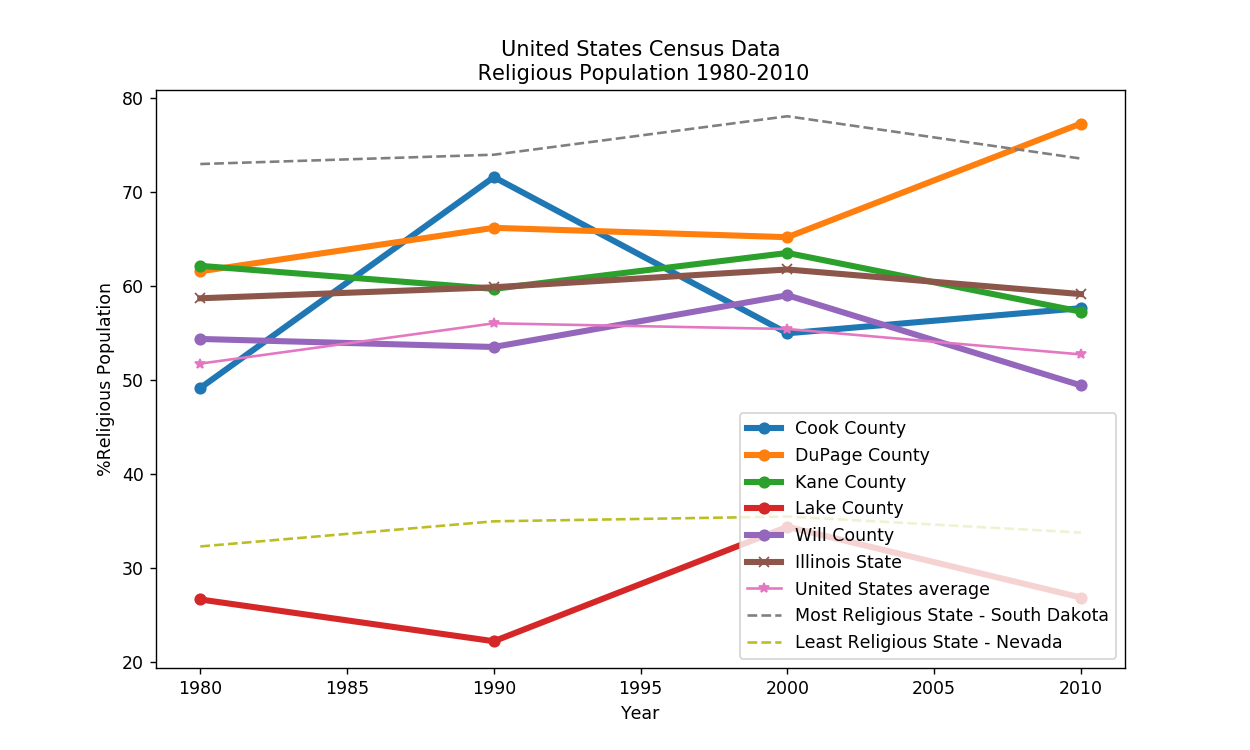

In [14]:
plt.figure(figsize = (10,6))
plt.plot(x, cook,'-o', lw = 3.5, label = 'Cook County')
plt.plot(x, dupage,'-o', lw = 3.5, label = 'DuPage County')
plt.plot(x, kane,'-o', lw = 3.5, label = 'Kane County')
plt.plot(x, lake,'-o', lw = 3.5, label = 'Lake County')
plt.plot(x, will,'-o', lw = 3.5, label = 'Will County')



plt.plot(x,illinois, '-x', lw = 3.5, label = 'Illinois State')
plt.plot(x,nation,'-*',label = 'United States average')
plt.plot(x,most_state,'--',label = 'Most Religious State - South Dakota')
plt.plot(x,least_state, '--', label = 'Least Religious State - Nevada')
plt.xlabel('Year')
plt.ylabel('%Religious Population')
plt.title('United States Census Data\n Religious Population 1980-2010')
plt.legend(loc=4)